# THE SPARKS FOUNDATION : DATA SCIENCE AND BUSINESS ANALYTICS

# Task 2: Prediction Using Unsupervised ML

### Author: Rajula Saicharan

### Aim: To predict the optimum number of clusters from the given Iris dataset and represent it visually

#### IDE: Jupyter Notebook

# > Import the Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets

## >Reading the Data

In [16]:
data=pd.read_csv("Iris.csv")
print("Data imported Successfully")

Data imported Successfully


In [17]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data.shape

(150, 6)

In [12]:
data.describe()   #displays insights of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# >Visualize and analyze the dataset

In [13]:
corr_data=data.corr()   #find coorelation b/w data

In [14]:
corr_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


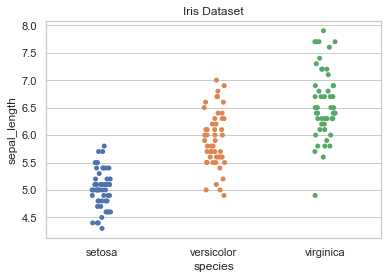

In [21]:
sns.set(style='whitegrid')                                                   #DATA VISUALIZATION
iris=sns.load_dataset('iris');
ax=sns.stripplot(x='species',y='sepal_length',data=iris);
plt.title('Iris Dataset')
plt.show()

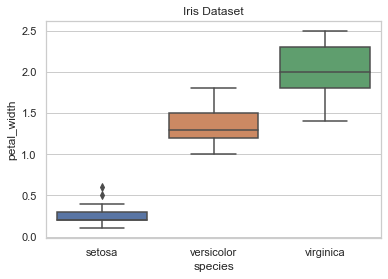

In [22]:
sns.boxplot(x='species',y='petal_width',data=iris);
plt.title("Iris Dataset")
plt.show()

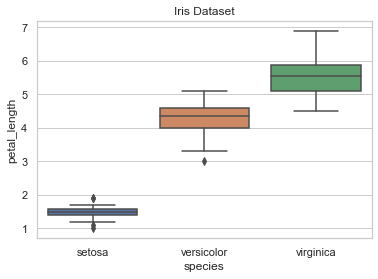

In [23]:
sns.boxplot(x='species',y='petal_length',data=iris);
plt.title('Iris Dataset')
plt.show()

<AxesSubplot:>

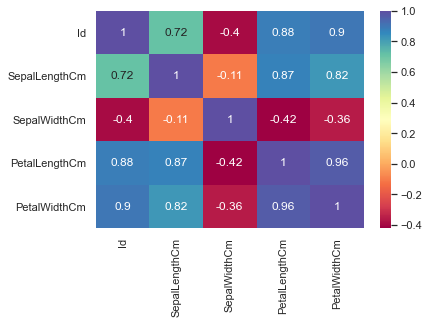

In [24]:
sns.heatmap(data.corr(),annot=True,cmap='Spectral')

## >Finding optimum number of cluster using K means clustering

In [27]:
x=data.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)
    print('k:',i,"wcss:",kmeans.inertia_)

k: 1 wcss: 281831.54466666654
k: 2 wcss: 70581.3808
k: 3 wcss: 31320.711199999994
k: 4 wcss: 17758.792503556186
k: 5 wcss: 11468.968747023802
k: 6 wcss: 7921.863473076923
k: 7 wcss: 5911.632365518538
k: 8 wcss: 4541.979023391812
k: 9 wcss: 3571.911095588236
k: 10 wcss: 2943.9331008403374


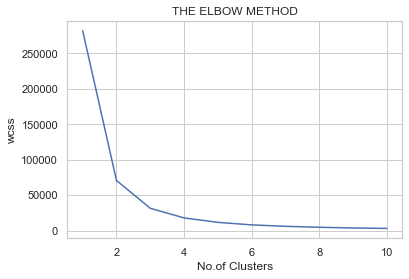

In [29]:
#plotting the results onto graph , allowing us to obseve the elbow
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('No.of Clusters')
plt.ylabel('wcss')
plt.show()

### here we can see that after 3 the drop in wcss in minimal, so we choose 3 as the optimum no.of clusters

# >Intializing k-means with optimum no.of clusters

In [30]:
kmeans= KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [31]:
#Predicting Values
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Visualizing the Clusters

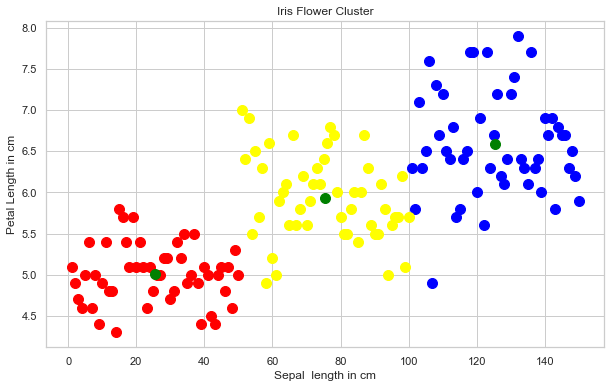

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='yellow',label='Iris-virginica')
#plotting centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='green',label='Centroids')
plt.title('Iris Flower Cluster')
plt.xlabel('Sepal  length in cm')
plt.ylabel('Petal Length in cm')
plt.show()






